<a href="https://colab.research.google.com/github/YeshwanthSadum/YeshwanthSadum-Data-Visualization-Projects/blob/main/pdv_project_Amazon_Earphone_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fake_useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=cae1d6919650f4f10987fcd41ef9bc9398f3d1fec2d459101f3bc5b2b26aeeea
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [7]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

ua = UserAgent()
header = {'user-agent':ua.chrome}
google_page = requests.get('https://www.amazon.in/s?k=headphones&crid=1KNIU0KIZ8UF4&sprefix=headphones%2Caps%2C253&ref=nb_sb_noss_1',headers=header)
#print(google_page.content)

soup = BeautifulSoup(google_page.content,'lxml') # html.parser

#print(soup.prettify())

In [9]:
import pandas as pd
import numpy as np

In [19]:
soup.find('a',class_="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal").text

'boAt Rockerz 550 Bluetooth Wireless Over Ear Headphone with Mic (Black) '

In [20]:
def soup_df(soup):
  df = pd.DataFrame(np.zeros(1000))
  df['Product name'] = soup.find('a',class_="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal").text
  df['mrp'] = soup.find('span',class_="a-price a-text-price").span.text
  df['rating'] = (soup.find('div',class_="a-row a-size-small").text).split()[0]
  df['reviews'] = (soup.find('div',class_="a-row a-size-small").text).split()[5]
  df['offer price'] = soup.find('span',class_="a-price-whole").text
  i = 0
  for data in soup.find_all('a',class_="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"):
    df['Product name'].iloc[i] = data.text
    i=i+1
    
  i = 0
  for mrp in soup.find_all('span',class_="a-price a-text-price"):
    df['mrp'].iloc[i] = float(mrp.span.text[1:].replace(',',''))
    i=i+1
    
  i = 0
  for rating in soup.find_all('div',class_="a-row a-size-small"):
    df['rating'].iloc[i] = float((rating.text).split()[0])
    i=i+1
    
  i = 0
  for reviews in soup.find_all('div',class_="a-row a-size-small"):
    df['reviews'].iloc[i] = (reviews.text).split()[5].replace(',','')
    i=i+1
    
  i = 0
  for offer in soup.find_all('span',class_="a-price-whole"):
    df['offer price'].iloc[i] = float(offer.text.replace(',',''))
    i=i+1
  
  df = df.drop(0, axis = 1)
  df = df.drop_duplicates(['Product name'])
  return df

In [43]:
df = soup_df(soup)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
df1.head()

,Product name,mrp,rating,reviews,offer price
0,boAt Rockerz 550 Bluetooth Wireless Over Ear H...,4999.0,4.1,36277,1899.0
1,boAt Rockerz 450 Pro Bluetooth Wireless On Ear...,3990.0,4.1,69124,1799.0
2,Boult Audio Bass Buds Q2 Wired Over Ear Headph...,2490.0,3.9,9902,599.0
3,ENVOUS New Wireless Bluetooth Headset Headphon...,999.0,4.0,576,299.0
5,pTron Studio Over Ear Bluetooth 5.0 Wireless H...,1999.0,3.8,13580,799.0


In [27]:
def next_page_soup(soup):
  next_page = soup.find('a', class_="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator")['href']
  ua = UserAgent()
  header = {'user-agent':ua.chrome}
  google_page = requests.get(str('https://www.amazon.in'+next_page),headers=header)
  #print(google_page.content)

  soup1 = BeautifulSoup(google_page.content,'lxml') # html.parser
  return soup1

In [34]:
soup1 = next_page_soup(soup)

In [35]:
soup2 = next_page_soup(soup1)

In [36]:
soup3 = next_page_soup(soup2)

In [39]:
soup4 = next_page_soup(soup3)

In [40]:
soup5 = next_page_soup(soup4)

In [41]:
df1 = soup_df(soup1)
df2 = soup_df(soup2)
df3 = soup_df(soup3)
df5 = soup_df(soup4)
df6 = soup_df(soup5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
df4 =pd.concat([df,df1,df2,df3,df5,df6], axis = 0)
df4 = df4.drop_duplicates(['Product name'])
df4

,Product name,mrp,rating,reviews,offer price
0,boAt Rockerz 550 Bluetooth Wireless Over Ear H...,4999.0,4.1,36277,1899.0
1,boAt Rockerz 450 Pro Bluetooth Wireless On Ear...,3990.0,4.1,69124,1799.0
2,boAt Rockerz 450 Bluetooth Wireless On Ear Hea...,3990.0,4.1,69124,1399.0
3,boAt Bassheads 900 Wired On Ear Headphones wit...,2490.0,4.2,72287,699.0
4,boAt Rockerz 370 Bluetooth Wireless On Ear Hea...,2499.0,4.0,18502,999.0
...,...,...,...,...,...
15,Teqneq All Smartphone Bluetooth Bluetooth Trul...,999.0,4.0,193,249.0
16,U & I Alarm Series Uinb-4851 Bluetooth Wireles...,2999.0,3.9,45808,599.0
17,pTron Tangentbeat Bluetooth 5.0 Wireless Headp...,2499.0,4.2,58314,699.0
18,boAt Bassheads 102 in Ear Wired Earphones with...,1290.0,4.9,101,349.0


In [47]:
df4['reviews'].unique()

array(['36277', '69124', '72287', '18502', '87986', '40841', '15320',
       '1223', '469', '58781', '37052', '5806', '80514', '23496', '389',
       '45916', '37053', '43306', '28635', '66926', '9902', '4318',
       '36419', '576', '13580', '15362', '9633', '10', '38686', '45808',
       '293316', '7926', '132', '5', '3230', '6221', '1243', '7', '23219',
       '173337', '113540', '2610', '96', '21', '10438', '48365', '73831',
       '3356', '12933', '12987', '5917', '164218', '2', '442765', '674',
       '80', '4793', '17508', '111177', '36', '193', '58314', '101'],
      dtype=object)

In [48]:
df4['reviews'] = df4['reviews'].astype(str)
df4 = df4.reset_index(drop=True)

In [50]:
i = 0

for i in range(len(df4['reviews'])):
  df4['reviews'][i] = df4['reviews'][i].replace(',','')

In [51]:
df4['reviews'] = df4['reviews'].astype(float)
df4 = df4[df4['reviews']>100]

In [52]:
df4.shape

(80, 5)

In [53]:
df4['discount'] = (1-(df4['offer price']/df4['mrp']))*100
df4.head()

,Product name,mrp,rating,reviews,offer price,discount
0,boAt Rockerz 550 Bluetooth Wireless Over Ear H...,4999.0,4.1,36277.0,1899.0,62.012402
1,boAt Rockerz 450 Pro Bluetooth Wireless On Ear...,3990.0,4.1,69124.0,1799.0,54.912281
2,boAt Rockerz 450 Bluetooth Wireless On Ear Hea...,3990.0,4.1,69124.0,1399.0,64.937343
3,boAt Bassheads 900 Wired On Ear Headphones wit...,2490.0,4.2,72287.0,699.0,71.927711
4,boAt Rockerz 370 Bluetooth Wireless On Ear Hea...,2499.0,4.0,18502.0,999.0,60.02401


In [54]:
new_df = df4.groupby('rating').sum()

In [55]:
new_df['reviews']

rating
3.5      67600.0
3.6     158224.0
3.7       5917.0
3.8      65563.0
3.9     567430.0
4.0     271747.0
4.1    1810192.0
4.2     378145.0
4.3     284514.0
4.5       5806.0
4.9        101.0
Name: reviews, dtype: float64

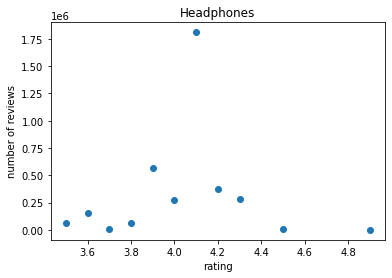

In [56]:
import matplotlib.pyplot as plt
plt.scatter(new_df.index,new_df['reviews'])
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.title('Headphones')
plt.show()


**The below code will recomend the best headphone considering maximum reviews,rating and discount** - **max(reviews x rating x discount)**






In [58]:
df4['rating'] = df4['rating'].astype(float)
df4['col'] = df4['reviews']*df4['rating']*df4['discount']

df4[df4['col'] == (df4['reviews']*df4['rating']*df4['discount']).max()]

,Product name,mrp,rating,reviews,offer price,discount,col
71,boAt Rockerz 255 in-Ear Earphones with 8 Hours...,2990.0,4.1,442765.0,1199.0,59.899666,108738049.214047


**It turns out that the same earphone is on amazon's choice**

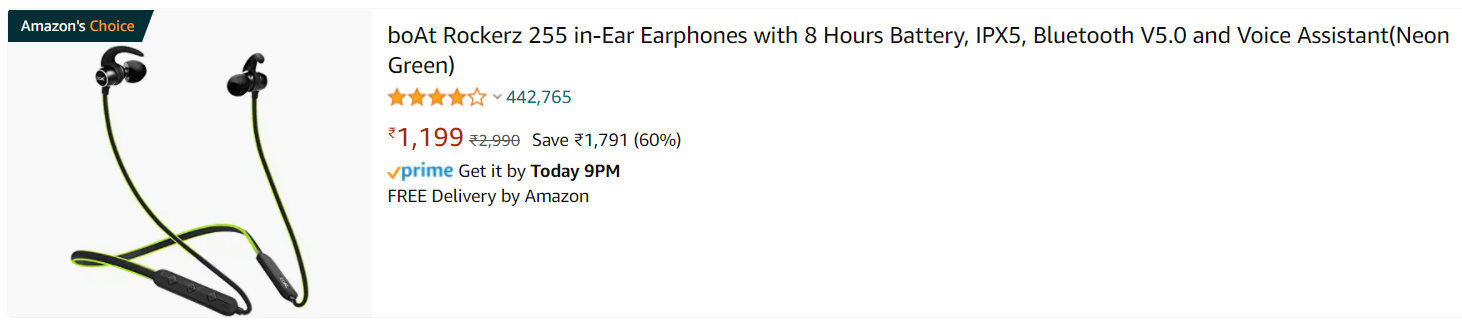

In [59]:
df4.drop(['col'], axis = 1, inplace = True)


In [60]:
df4.to_csv('Headphone prices')
df4.shape
df4.head()

,Product name,mrp,rating,reviews,offer price,discount
0,boAt Rockerz 550 Bluetooth Wireless Over Ear H...,4999.0,4.1,36277.0,1899.0,62.012402
1,boAt Rockerz 450 Pro Bluetooth Wireless On Ear...,3990.0,4.1,69124.0,1799.0,54.912281
2,boAt Rockerz 450 Bluetooth Wireless On Ear Hea...,3990.0,4.1,69124.0,1399.0,64.937343
3,boAt Bassheads 900 Wired On Ear Headphones wit...,2490.0,4.2,72287.0,699.0,71.927711
4,boAt Rockerz 370 Bluetooth Wireless On Ear Hea...,2499.0,4.0,18502.0,999.0,60.02401
